In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

2025-12-01 17:20:09.083556: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-01 17:20:09.116949: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-01 17:20:09.117023: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-01 17:20:09.117863: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-01 17:20:09.123180: I tensorflow/core/platform/cpu_feature_guar

In [2]:
data = pd.read_csv("/work/Final_data.csv")
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [3]:
data.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

In [5]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,38.851453,73.898832,1.723093,179.889702,143.704306,62.195813,1.259446,1280.109600,26.101313,2.627485,...,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,6.701144,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197579e+19
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,20.094975,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.441978e+19
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,24.119097,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.371578e+19
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,28.562620,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100442e+20
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20


# Model Pertama

In [6]:
median_non_neg = data[data['Physical exercise'] >= 0]['Physical exercise'].median()
data['Physical exercise'] = data['Physical exercise'].apply(lambda x: median_non_neg if x < 0 else x)

print(data['Physical exercise'].describe())

count    20000.000000
mean         0.464266
std          0.981135
min         -0.000000
25%          0.010000
50%          0.020000
75%          0.040000
max          4.050000
Name: Physical exercise, dtype: float64


In [7]:
# mengubah data gender jadi 0 dan 1
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [8]:
common_features = [
    'Age', 
    'Gender', 
    'Weight (kg)', 
    'Height (m)', 
    'BMI',
    'Workout_Frequency (days/week)', 
    'Session_Duration (hours)', 
    'Workout_Type',
    'Daily meals frequency', 
    'diet_type', 
    'Calories', 
    'Physical exercise',
    'Experience_Level', 
]

# Pastikan semua fitur ini ada di df_encoded
available_features = [f for f in common_features if f in data.columns]
X_common = data[available_features]
y_calories = data['Calories_Burned']

print("Fitur umum yang digunakan untuk model kalori:")
print(available_features)
print("\nJumlah fitur umum:", len(available_features))

Fitur umum yang digunakan untuk model kalori:
['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'BMI', 'Workout_Frequency (days/week)', 'Session_Duration (hours)', 'Workout_Type', 'Daily meals frequency', 'diet_type', 'Calories', 'Physical exercise', 'Experience_Level']

Jumlah fitur umum: 13


In [9]:

# Encode kolom kategorikal dalam common_features
onehot_cols_common = ['Workout_Type', 'diet_type']
label_cols_common = []  # Tidak ada dalam daftar fitur umum saat ini, tapi siapkan jika diperlukan

# Salin data umum
df_common_encoded = X_common.copy()

# One-Hot Encoding
if onehot_cols_common:
    ohe_common = OneHotEncoder(sparse_output=False, drop='first')
    ohe_result_common = ohe_common.fit_transform(df_common_encoded[onehot_cols_common])
    ohe_df_common = pd.DataFrame(ohe_result_common, columns=ohe_common.get_feature_names_out(onehot_cols_common))
    df_common_encoded = df_common_encoded.drop(columns=onehot_cols_common).join(ohe_df_common)

# Scaling
numeric_cols_common = df_common_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols_common = df_common_encoded.columns.difference(numeric_cols_common)

scaler_common = StandardScaler()
scaled_numeric_common = scaler_common.fit_transform(df_common_encoded[numeric_cols_common])
scaled_df_common = pd.DataFrame(scaled_numeric_common, columns=numeric_cols_common)
X_common_processed = df_common_encoded[categorical_cols_common].join(scaled_df_common)

print("Data umum siap untuk model kalori.")
print("X_common_processed shape:", X_common_processed.shape)

Data umum siap untuk model kalori.
X_common_processed shape: (20000, 19)


In [10]:
X_cal_train, X_cal_temp, y_cal_train, y_cal_temp = train_test_split(X_common_processed, y_calories, test_size=0.3, random_state=42)
X_cal_val, X_cal_test, y_cal_val, y_cal_test = train_test_split(X_cal_temp, y_cal_temp, test_size=0.5, random_state=42)

print("Split data untuk model kalori:")
print(f"Train: {X_cal_train.shape[0]}")
print(f"Validation: {X_cal_val.shape[0]}")
print(f"Test: {X_cal_test.shape[0]}")

Split data untuk model kalori:
Train: 14000
Validation: 3000
Test: 3000


In [11]:
# Model untuk prediksi kalori
model_calories = Sequential([
    Dense(128, activation='relu', input_shape=(X_cal_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output: Calories_Burned
])

model_calories.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)
model_calories.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [12]:
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=10,         # Jika dalam 10 epoch gak membaik, STOP paksa.
    restore_best_weights=True, # Ambil model di epoch terbaik, bukan epoch terakhir.
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,          # Kalau macet, kurangi learning rate jadi 20%-nya
    patience=5,          # Tunggu 5 epoch baru kurangi
    min_lr=0.00001,      # Batas bawah learning rate
    verbose=1
)

In [13]:
# Latih model
history_cal = model_calories.fit(
    X_cal_train, y_cal_train,
    validation_data=(X_cal_val, y_cal_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

# Evaluasi
y_cal_pred = model_calories.predict(X_cal_test)
mae_cal = mean_absolute_error(y_cal_test, y_cal_pred)
r2_cal = r2_score(y_cal_test, y_cal_pred)

print(f"\nEvaluasi Model Kalori:")
print(f"MAE: {mae_cal:.2f}")
print(f"R²: {r2_cal:.4f}")

Epoch 1/100
438/438 - 2s - loss: 496702.2500 - mae: 481.4275 - val_loss: 16502.2285 - val_mae: 104.6825 - lr: 0.0010 - 2s/epoch - 3ms/step
Epoch 2/100
438/438 - 0s - loss: 54516.5977 - mae: 179.9519 - val_loss: 7645.4287 - val_mae: 70.6410 - lr: 0.0010 - 416ms/epoch - 949us/step
Epoch 3/100
438/438 - 0s - loss: 47981.1328 - mae: 167.9526 - val_loss: 4480.7002 - val_mae: 53.0909 - lr: 0.0010 - 438ms/epoch - 1ms/step
Epoch 4/100
438/438 - 0s - loss: 46336.1719 - mae: 163.3577 - val_loss: 3615.0757 - val_mae: 48.1684 - lr: 0.0010 - 437ms/epoch - 998us/step
Epoch 5/100
438/438 - 0s - loss: 44208.4297 - mae: 159.9698 - val_loss: 4312.9780 - val_mae: 53.5916 - lr: 0.0010 - 444ms/epoch - 1ms/step
Epoch 6/100
438/438 - 0s - loss: 44117.3945 - mae: 159.3010 - val_loss: 2940.5710 - val_mae: 43.7557 - lr: 0.0010 - 428ms/epoch - 978us/step
Epoch 7/100
438/438 - 0s - loss: 45814.6289 - mae: 161.6685 - val_loss: 2744.3049 - val_mae: 42.3950 - lr: 0.0010 - 419ms/epoch - 957us/step
Epoch 8/100
438/438

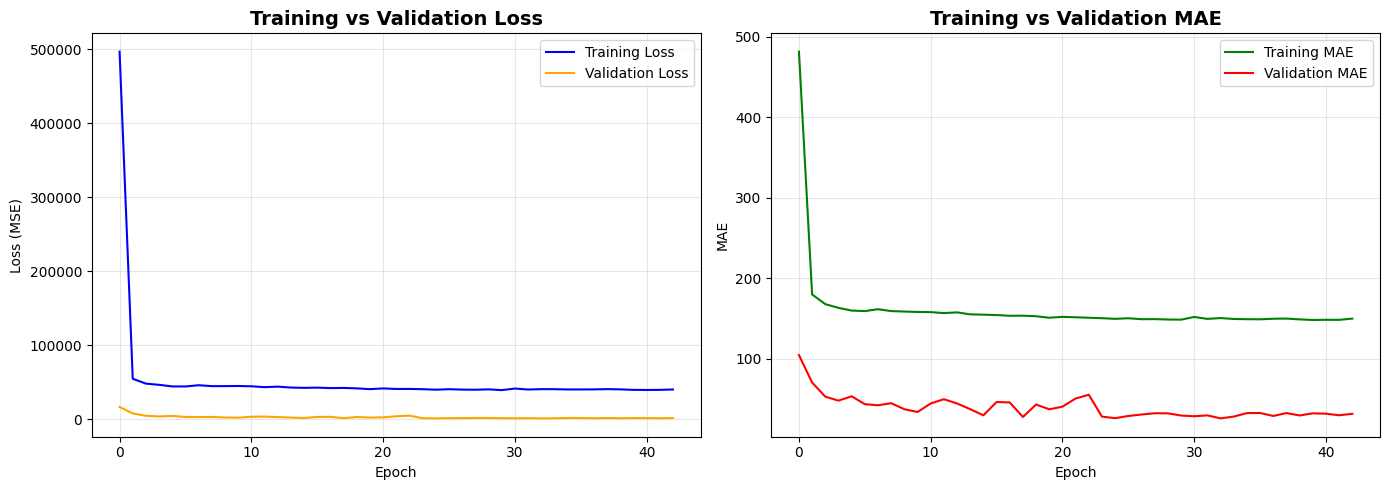

In [14]:
loss = history_cal.history['loss']
val_loss = history_cal.history['val_loss']
mae = history_cal.history['mae']
val_mae = history_cal.history['val_mae']

# Plot Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.plot(val_mae, label='Validation MAE', color='red')
plt.title('Training vs Validation MAE', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
# Evaluasi model
y_cal_pred = model_calories.predict(X_cal_test)

mae_cal = mean_absolute_error(y_cal_test, y_cal_pred)
mse_cal = mean_squared_error(y_cal_test, y_cal_pred)
r2_cal = r2_score(y_cal_test, y_cal_pred)

print("\n📊 EVALUASI MODEL PREDIKSI KALORI")
print("="*40)
print(f"Mean Absolute Error (MAE):  {mae_cal:.2f}")
print(f"Mean Squared Error (MSE):  {mse_cal:.2f}")
print(f"R² Score:                  {r2_cal:.4f}")
print("="*40)

94/94 [==============================] - 0s 618us/step

📊 EVALUASI MODEL PREDIKSI KALORI
Mean Absolute Error (MAE):  25.83
Mean Squared Error (MSE):  980.59
R² Score:                  0.9962


# Model Kedua

In [16]:
model_calories_opt = Sequential([
    Dense(256, input_shape=(X_cal_train.shape[1],)), 
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    Dense(32),
    LeakyReLU(alpha=0.1),

    Dense(1) 
])

model_calories_opt.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model_calories_opt.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               5120      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0         
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [17]:
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=10,         # Jika dalam 10 epoch gak membaik, STOP paksa.
    restore_best_weights=True, # Ambil model di epoch terbaik, bukan epoch terakhir.
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,          # Kalau macet, kurangi learning rate jadi 20%-nya
    patience=5,          # Tunggu 5 epoch baru kurangi
    min_lr=0.00001,      # Batas bawah learning rate
    verbose=1
)

In [18]:
history_cal_opt = model_calories_opt.fit(
    X_cal_train, y_cal_train,
    validation_data=(X_cal_val, y_cal_val),
    epochs=500,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=2
)


Epoch 1/500
438/438 - 1s - loss: 418672.5938 - mae: 407.5905 - val_loss: 8829.3145 - val_mae: 75.5690 - lr: 0.0010 - 1s/epoch - 3ms/step
Epoch 2/500
438/438 - 0s - loss: 19244.4277 - mae: 107.7083 - val_loss: 4062.5830 - val_mae: 51.3761 - lr: 0.0010 - 492ms/epoch - 1ms/step
Epoch 3/500
438/438 - 0s - loss: 16155.7090 - mae: 97.5683 - val_loss: 3046.7886 - val_mae: 44.4718 - lr: 0.0010 - 478ms/epoch - 1ms/step
Epoch 4/500
438/438 - 0s - loss: 15021.5488 - mae: 94.4867 - val_loss: 2377.9182 - val_mae: 39.1139 - lr: 0.0010 - 493ms/epoch - 1ms/step
Epoch 5/500
438/438 - 0s - loss: 13832.5078 - mae: 89.7839 - val_loss: 2056.8821 - val_mae: 34.3439 - lr: 0.0010 - 474ms/epoch - 1ms/step
Epoch 6/500
438/438 - 0s - loss: 13387.1201 - mae: 88.2857 - val_loss: 1923.8699 - val_mae: 33.2766 - lr: 0.0010 - 463ms/epoch - 1ms/step
Epoch 7/500
438/438 - 0s - loss: 12847.4766 - mae: 86.4625 - val_loss: 1647.0602 - val_mae: 32.1742 - lr: 0.0010 - 460ms/epoch - 1ms/step
Epoch 8/500
438/438 - 0s - loss: 1

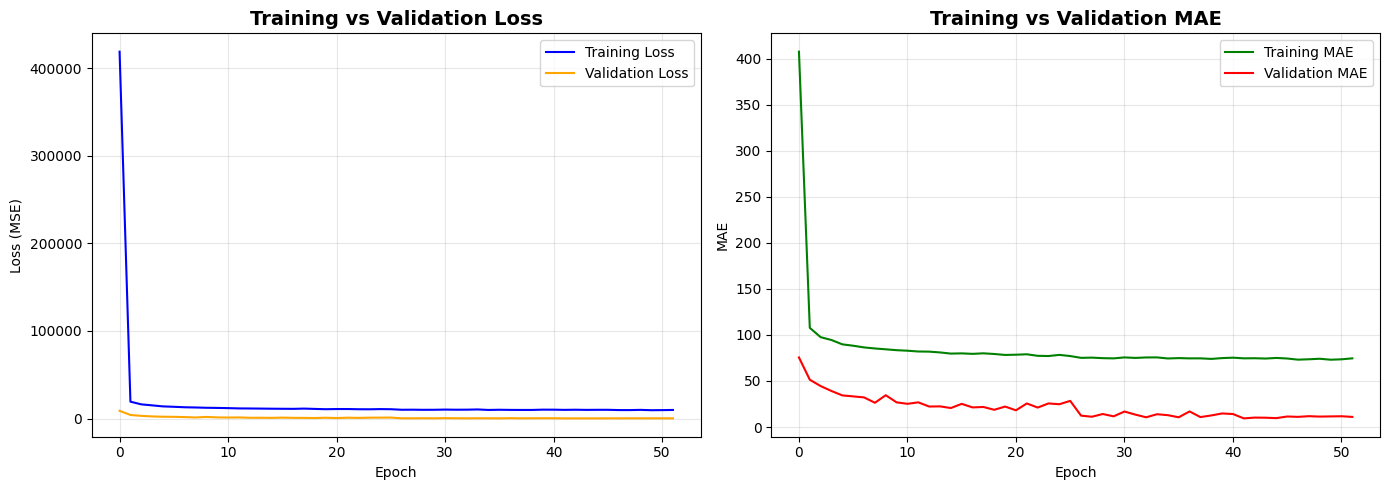

In [19]:
loss = history_cal_opt.history['loss']
val_loss = history_cal_opt.history['val_loss']
mae = history_cal_opt.history['mae']
val_mae = history_cal_opt.history['val_mae']

# Plot Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.plot(val_mae, label='Validation MAE', color='red')
plt.title('Training vs Validation MAE', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

94/94 [==============================] - 0s 623us/step


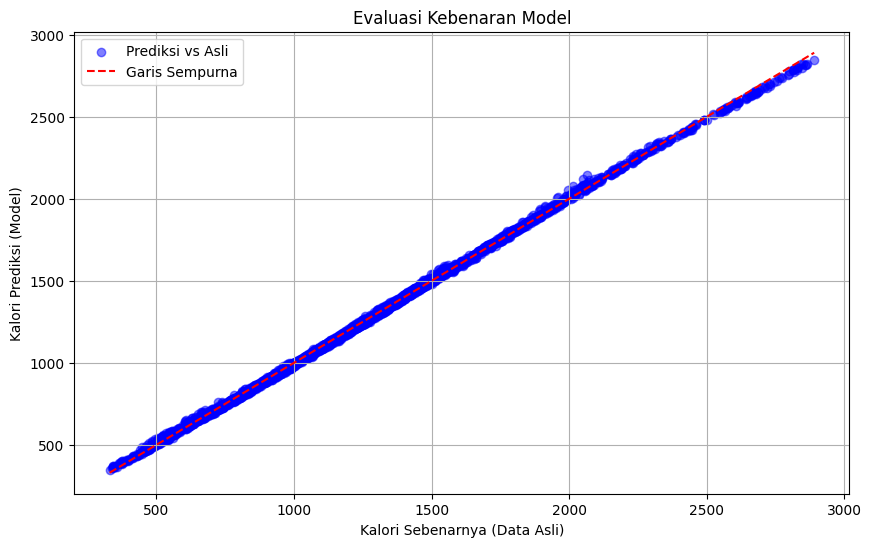

--- Cek 5 Data Acak ---
Asli: 870.41 | Prediksi: 868.58 | Meleset: 1.83
Asli: 932.80 | Prediksi: 926.06 | Meleset: 6.74
Asli: 2688.40 | Prediksi: 2651.59 | Meleset: 36.81
Asli: 724.02 | Prediksi: 713.04 | Meleset: 10.98
Asli: 1415.98 | Prediksi: 1408.39 | Meleset: 7.59


In [20]:
# Minta model memprediksi data validasi
predictions = model_calories_opt.predict(X_cal_val)

plt.figure(figsize=(10, 6))

# Gambar titik-titik (Data Asli vs Prediksi)
plt.scatter(y_cal_val, predictions, alpha=0.5, color='blue', label='Prediksi vs Asli')

# Gambar Garis Merah (Garis Sempurna)
# Kalau semua titik nempel di garis merah ini, berarti akurasi 100%
min_val = min(np.min(y_cal_val), np.min(predictions))
max_val = max(np.max(y_cal_val), np.max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Garis Sempurna')

plt.title('Evaluasi Kebenaran Model')
plt.xlabel('Kalori Sebenarnya (Data Asli)')
plt.ylabel('Kalori Prediksi (Model)')
plt.legend()
plt.grid(True)
plt.show()

# Cek sampel acak (biar kamu percaya)
print("--- Cek 5 Data Acak ---")
for i in range(5):
    print(f"Asli: {y_cal_val.iloc[i]:.2f} | Prediksi: {predictions[i][0]:.2f} | Meleset: {abs(y_cal_val.iloc[i] - predictions[i][0]):.2f}")

In [21]:
r2 = r2_score(y_cal_val, predictions)
print(f"R-Squared Score: {r2:.4f}")

R-Squared Score: 0.9994


In [22]:
y_cal_pred_opt = model_calories_opt.predict(X_cal_test)

mae_cal_opt = mean_absolute_error(y_cal_test, y_cal_pred_opt)
mse_cal_opt = mean_squared_error(y_cal_test, y_cal_pred_opt)
r2_cal_opt = r2_score(y_cal_test, y_cal_pred_opt)

print("\n📊 EVALUASI MODEL PREDIKSI KALORI")
print("="*50)
print(f"Mean Absolute Error (MAE):  {mae_cal_opt:.2f}")
print(f"Mean Squared Error (MSE):  {mse_cal_opt:.2f}")
print(f"R² Score:                  {r2_cal_opt:.4f}")
print("="*50)

94/94 [==============================] - 0s 575us/step

📊 EVALUASI MODEL PREDIKSI KALORI
Mean Absolute Error (MAE):  9.34
Mean Squared Error (MSE):  151.43
R² Score:                  0.9994


In [23]:
y_pred_train = model_calories_opt.predict(X_cal_train)
y_pred_val = model_calories_opt.predict(X_cal_val)
y_pred_test = model_calories_opt.predict(X_cal_test)

# Hitung R2 Score (Akurasi)
r2_train = r2_score(y_cal_train, y_pred_train)
r2_val = r2_score(y_cal_val, y_pred_val)
r2_test = r2_score(y_cal_test, y_pred_test)

print("--- DIAGNOSIS OVERFITTING ---")
print(f"R² Train (Hafalan): {r2_train:.4f}")
print(f"R² Validasi (Latihan): {r2_val:.4f}")
print(f"R² Test (Ujian Asli):  {r2_test:.4f}")

# Analisis Sederhana
if r2_train > r2_test + 0.15: # Jika selisih lebih dari 15%
    print("\nKESIMPULAN: Terjadi OVERFITTING PARAH.")
    print("Solusi: Kurangi kompleksitas model, tambah Dropout, atau perbesar data.")
elif r2_test < 0.5:
    print("\nKESIMPULAN: Model belum belajar dengan baik (UNDERFITTING) atau Data Test terlalu sulit.")
else:
    print("\nKESIMPULAN: Model cukup seimbang (Good Fit).")

94/94 [==============================] - 0s 546us/step
--- DIAGNOSIS OVERFITTING ---
R² Train (Hafalan): 0.9994
R² Validasi (Latihan): 0.9994
R² Test (Ujian Asli):  0.9994

KESIMPULAN: Model cukup seimbang (Good Fit).


In [24]:
print("\n📈 PERBANDINGAN MODEL")
print("-" * 30)
print(f"Model Lama - MAE: {mae_cal:.2f}")
print(f"Model Baru - MAE: {mae_cal_opt:.2f}")

if mae_cal_opt < mae_cal:
    print("✅ Model baru lebih akurat!")
elif mae_cal_opt > mae_cal:
    print("❌ Model lama lebih baik.")
else:
    print("➡️ Keduanya memiliki akurasi yang sama.")


📈 PERBANDINGAN MODEL
------------------------------
Model Lama - MAE: 25.83
Model Baru - MAE: 9.34
✅ Model baru lebih akurat!


In [25]:

# nama_file = 'model_kalori_v2.h5'

# # Simpan
# model_calories_opt.save(nama_file)

# # Verifikasi apakah file berhasil dibuat
# if os.path.exists(nama_file):
#     ukuran = os.path.getsize(nama_file) / 1024 # dalam KB
#     print(f"✅ SUKSES! File '{nama_file}' tersimpan di Deepnote.")
#     print(f"📁 Ukuran file: {ukuran:.2f} KB")
#     print("👉 Lihat sidebar kanan (Files) untuk mendownload.")
# else:
#     print("❌ Gagal menyimpan.")

In [26]:
from tensorflow.keras.models import load_model

# Memanggil arwah model yang sudah disimpan
model_siap_pakai = load_model('/work/model_kalori_v2.h5')

# Tes langsung prediksi (tanpa training lagi)
print("Model siap digunakan!")
model_siap_pakai.summary()

Model siap digunakan!
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               5120      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                16448     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64)                0         
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (No

In [27]:
import joblib

# Evaluasi model
print("\n📊 EVALUASI MODEL PREDIKSI KALORI (Setelah Optimasi)")
print("="*50)
print(f"Mean Absolute Error (MAE):  {mae_cal_opt:.2f}")
print(f"Mean Squared Error (MSE):  {mse_cal_opt:.2f}")
print(f"R² Score:                  {r2_cal_opt:.4f}")
print("="*50)

# Export model ke .pkl
model_filename = 'model_calories_opt.pkl'
joblib.dump(model_calories_opt, model_filename)
print(f"Model diexport ke {model_filename}")


📊 EVALUASI MODEL PREDIKSI KALORI (Setelah Optimasi)
Mean Absolute Error (MAE):  9.34
Mean Squared Error (MSE):  151.43
R² Score:                  0.9994
Model diexport ke model_calories_opt.pkl


In [30]:
from sklearn.metrics import mean_absolute_percentage_error

# Hitung MAPE (Skala 0-1)
mape = mean_absolute_percentage_error(y_cal_val, predictions)

# Ubah ke Persen (Skala 0-100)
mape_persen = mape * 100

print(f"MAE Murni (Kalori): {6.01}")
print(f"MAE dalam Persen (Seperti Tabel Paper): {mape_persen:.2f} %")

MAE Murni (Kalori): 6.01
MAE dalam Persen (Seperti Tabel Paper): 0.86 %


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=209310e2-eb5a-41e9-a9b8-e31c4303b8d1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>